# data setting,functionsabs

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from IPython.display import display
from cycler import cycler


plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.prop_cycle'] = cycler(color=["black"])
# plt.rcParams['']




def linear_regression(X,Y): 
    model = LinearRegression(fit_intercept=False)
    model.fit(X.reshape(-1,1), Y.reshape(-1,1))
    pred = model.predict(X.reshape(-1,1)).flatten()
    return model, pred

def predict(model, input_data): 
    return model.predict(input_data.reshape(-1,1)).squeeze()

In [2]:
dataframe = pd.read_excel("main.xlsx", sheet_name=["50", "100", "150"])
df_list = [dataframe["50"], dataframe["100"], dataframe["150"]]

for df in df_list:
    display(df)

,dst,1回目,2回目
0,0,50.0,50.0
1,30,46.4,47.5
2,60,44.1,45.2
3,74,30.8,31.3
4,104,28.4,29.1
5,116,15.9,16.2
6,146,13.2,13.2


,dst,1回目,2回目,3回目
0,0,100.0,100.0,100.0
1,30,92.8,93.2,93.4
2,60,87.1,87.5,87.7
3,74,57.6,57.9,58.1
4,104,51.8,52.2,52.4
5,116,25.4,25.7,25.6
6,146,19.3,19.3,19.1


,dst,1回目,2回目
0,0,150.0,150.0
1,30,139.3,139.5
2,60,130.3,130.5
3,74,83.8,84.2
4,104,74.8,75.2
5,116,34.4,34.6
6,146,25.0,24.9


In [55]:
def computeData(spec_times=("1回目", "1回目", "1回目")):
    measure_dst = dataframe['100']['dst'].values.astype(np.float32)
    sample_dst = np.array([65,69,109,111], dtype=np.float32)
    sample_dst_idx = ((0,1), (1,3), (3,4))
    temp_reg = np.zeros((3,4))
    # spec_times = ("1回目", "1回目", "1回目")
    spec_times = spec_times
    init_temp = ("50","100","150")
    return_df_list = []
    writer = pd.ExcelWriter("return.xlsx")
    return_df = {}
    
    fig, ax = plt.subplots(4,1, figsize=(13,25))
    
    for i,df in enumerate(df_list): 
        for j,(start,end) in enumerate(((0,3), (3,5), (5,7))): 
            X = measure_dst[start:end]
            Y = df[spec_times[i]][start:end].values.astype(np.float32)
            start,end = sample_dst_idx[j]
            model,pred = linear_regression(X-X[0],Y-Y[0])
            temp_reg[i][start:end] = predict(model, sample_dst[start:end]-X[0]).flatten()+Y[0]
            ax[i].scatter(X,Y,s=15)
            # ax[i].plot(X, pred+Y[0])
            ax[i].scatter(sample_dst[start:end],temp_reg[i][start:end],s=15,color='red')
            ax[i].plot(np.sort(np.concatenate([X,sample_dst[start:end]])),
                       np.sort(np.concatenate([pred+Y[0], temp_reg[i][start:end]]))[::-1])
            ax[i].plot((sample_dst[start:end], sample_dst[start:end]),(0,170),lw=1,color='black')
            
            ax[3].scatter(X,Y,s=15)
            ax[3].scatter(sample_dst[start:end],temp_reg[i][start:end],s=15,color='red')
            ax[3].plot(np.sort(np.concatenate([X,sample_dst[start:end]])),
                       np.sort(np.concatenate([pred+Y[0], temp_reg[i][start:end]]))[::-1])
            ax[3].plot((sample_dst[start:end], sample_dst[start:end]),(0,170),lw=1,color='black')
    
        r_df = pd.DataFrame()
        r_df['dst'] = np.sort(np.concatenate([measure_dst,sample_dst]))
        r_df['temp'] = np.sort(np.concatenate([df[spec_times[i]].values.astype(np.float32),
                                                    temp_reg[i]]))[::-1]
        # return_df[init_temp[i]] = r_df
        r_df.to_excel(writer,sheet_name=init_temp[i],index=False)
        
    writer.close()
    
     
    for i in range(3): 
        for j in range(2): 
            ax[i].plot((sample_dst[0+j*2],sample_dst[1+j*2]),
                   (temp_reg[i][0+j*2], temp_reg[i][1+j*2]),lw=1,color='black')
            ax[3].plot((sample_dst[0+j*2],sample_dst[1+j*2]),
                   (temp_reg[i][0+j*2], temp_reg[i][1+j*2]),lw=1,color='black')
    
    for i in range(4):
        ax[i].set_xlim(0,146)
        ax[i].set_ylim(0,170)
        ax[i].set_xticks(measure_dst)
        ax[i].set_xlabel(r"Distance from $t_0$ [\si{mm}]")
        ax[i].set_ylabel("Temperature [\si{\degreeCelsius}]")
    
    plt.savefig("graph.pdf", bbox_inches="tight")

    # return return_df_list

# compute

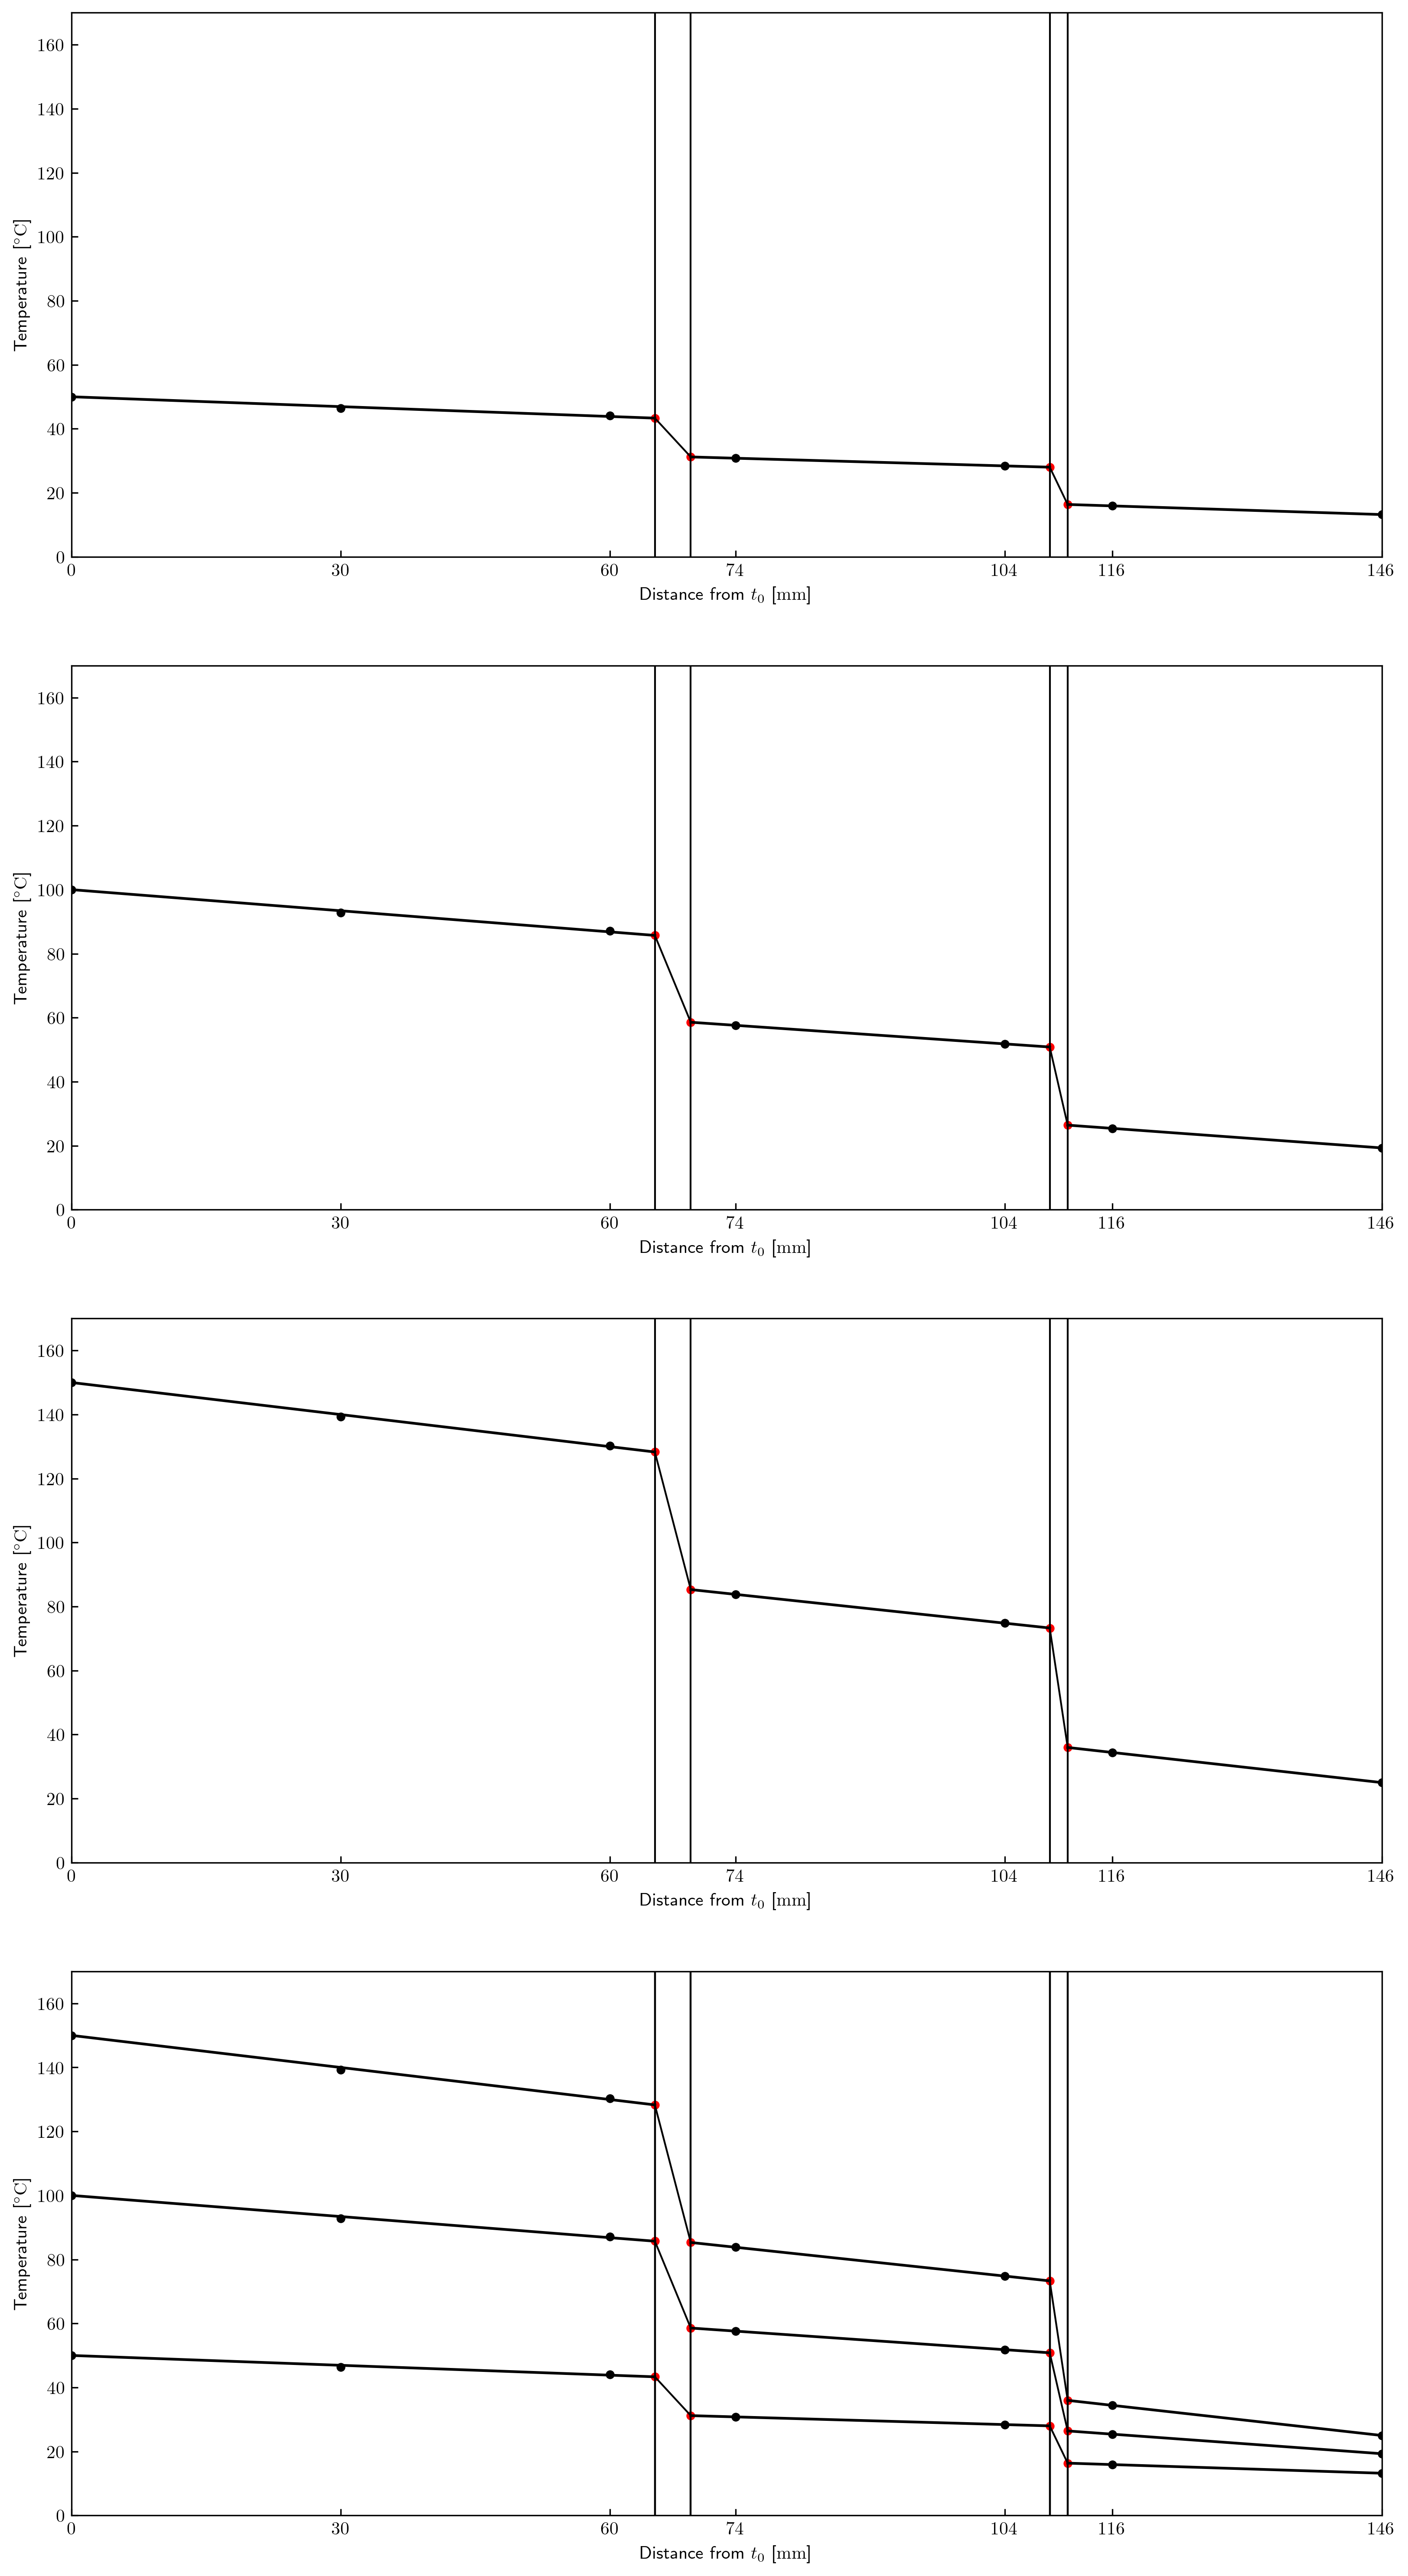

In [56]:
computeData(("1回目", "1回目", "1回目"))

In [71]:
df = pd.read_excel("return.xlsx", sheet_name=None)
for i in df.values(): 
    display(i)

,dst,temp
0,0,50.000000
1,30,46.400002
2,60,44.099998
3,65,43.326668
4,69,31.199999
5,74,30.799999
6,104,28.400000
7,109,28.000000
8,111,16.350000
9,116,15.900000


,dst,temp
0,0,100.000000
1,30,92.800003
2,60,87.099998
3,65,85.699997
4,69,58.566666
5,74,57.599998
6,104,51.799999
7,109,50.833332
8,111,26.416666
9,116,25.400000


,dst,temp
0,0,150.000000
1,30,139.300003
2,60,130.300003
3,65,128.290009
4,69,85.300003
5,74,83.800003
6,104,74.800003
7,109,73.300003
8,111,35.966667
9,116,34.400002


In [144]:
def delta_tpA(df): 
    return df["temp"][7] - df["temp"][8]

def delta_tpB(df): 
    return df["temp"][3] - df["temp"][4]

def delta_tR(df): 
    a = (df['temp'][1]-df['temp'][2]+
         df['temp'][5]-df['temp'][6]+
         df['temp'][9]-df['temp'][10])/3
    return a

In [148]:
df["result"] = pd.DataFrame(columns=["Δt'_A", "Δt'_B", "Δt_R", "λ'_A", "λ'_B", "λ"], index=[0,1,2])
LA = 2e-3
LB = 4e-3
LR = 30e-3
lambdaR = 372

for i,key in enumerate(("50","100","150")):
    df['result']["Δt'_A"][i] = delta_tpA(df[key])
    df['result']["Δt'_B"][i] = delta_tpB(df[key])
    df['result']["Δt_R"][i] = delta_tR(df[key])

df['result']["λ'_A"] = df['result']["Δt_R"]*LA*lambdaR/(df['result']["Δt'_A"]*LR)
df['result']["λ'_B" ]= df['result']["Δt_R"]*LB*lambdaR/(df['result']["Δt'_B"]*LR)
df['result']['λ'] = (LB-LA)/((LB/df['result']["λ'_B"]) - (LA/df['result']["λ'_A"]))

df['result']

,Δt'_A,Δt'_B,Δt_R,λ'_A,λ'_B,λ
0,11.65,12.126669,2.466667,5.250932,10.089061,128.334995
1,24.416666,27.133331,5.866668,5.958773,10.724328,53.555869
2,37.333336,42.990005,9.133334,6.067143,10.537644,40.042409


In [157]:
with pd.ExcelWriter("return.xlsx") as writer:
    for key in ("50","100","150","result"):
        df[key].to_excel(writer, index=None, sheet_name=key)